# НИР


1. Загрузка и первичный анализ данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

import warnings
warnings.filterwarnings("ignore")


Загрузка данных

In [7]:
import pandas as pd

# Загрузка локального CSV-файла
df = pd.read_csv('lifedata.csv')

# Вывод базовой информации
print("📐 Размерность датафрейма:", df.shape)
print("\n📊 Первые 5 строк:")
print(df.head())

print("\n🔍 Информация о типах данных:")
print(df.info())

print("\n🧼 Проверка пропущенных значений:")
print(df.isnull().sum())


📐 Размерность датафрейма: (2938, 22)

📊 Первые 5 строк:
       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  D

 Распределение целевой переменной (Life expectancy )

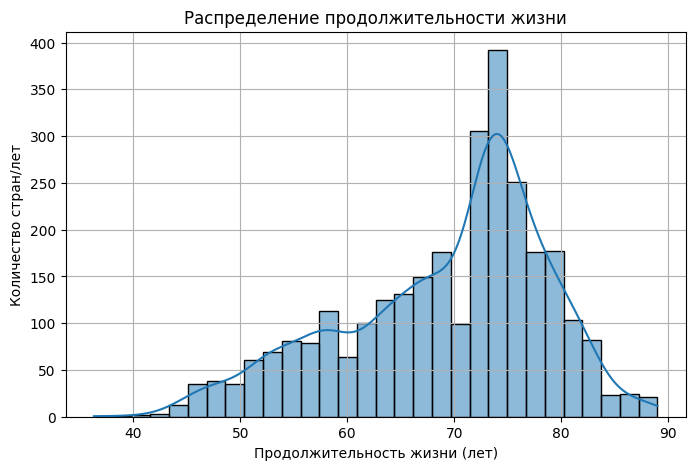

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['Life expectancy '], bins=30, kde=True)
plt.title("Распределение продолжительности жизни")
plt.xlabel("Продолжительность жизни (лет)")
plt.ylabel("Количество стран/лет")
plt.grid()
plt.show()


Зависимость от ВВП

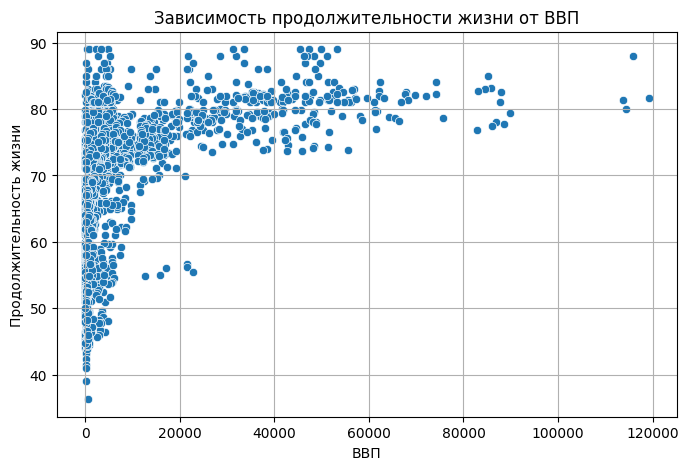

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='GDP', y='Life expectancy ')
plt.title("Зависимость продолжительности жизни от ВВП")
plt.xlabel("ВВП")
plt.ylabel("Продолжительность жизни")
plt.grid()
plt.show()


Зависимость от расходов на здравоохранение (% ВВП)

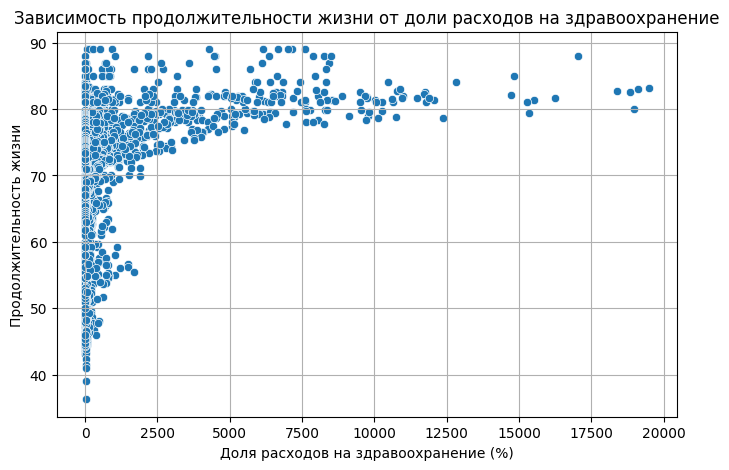

In [12]:
if 'percentage expenditure' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x='percentage expenditure', y='Life expectancy ')
    plt.title("Зависимость продолжительности жизни от доли расходов на здравоохранение")
    plt.xlabel("Доля расходов на здравоохранение (%)")
    plt.ylabel("Продолжительность жизни")
    plt.grid()
    plt.show()


Разница между развитыми и развивающимися странами

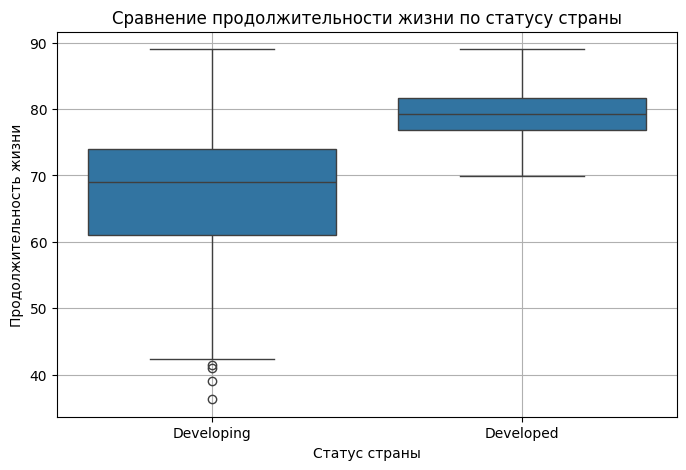

In [13]:
if 'Status' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Status', y='Life expectancy ', data=df)
    plt.title("Сравнение продолжительности жизни по статусу страны")
    plt.xlabel("Статус страны")
    plt.ylabel("Продолжительность жизни")
    plt.grid()
    plt.show()


Масштабирование

In [10]:
scaler = StandardScaler()
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

X_scaled = scaler.fit_transform(X)



4. Корреляционный анализ

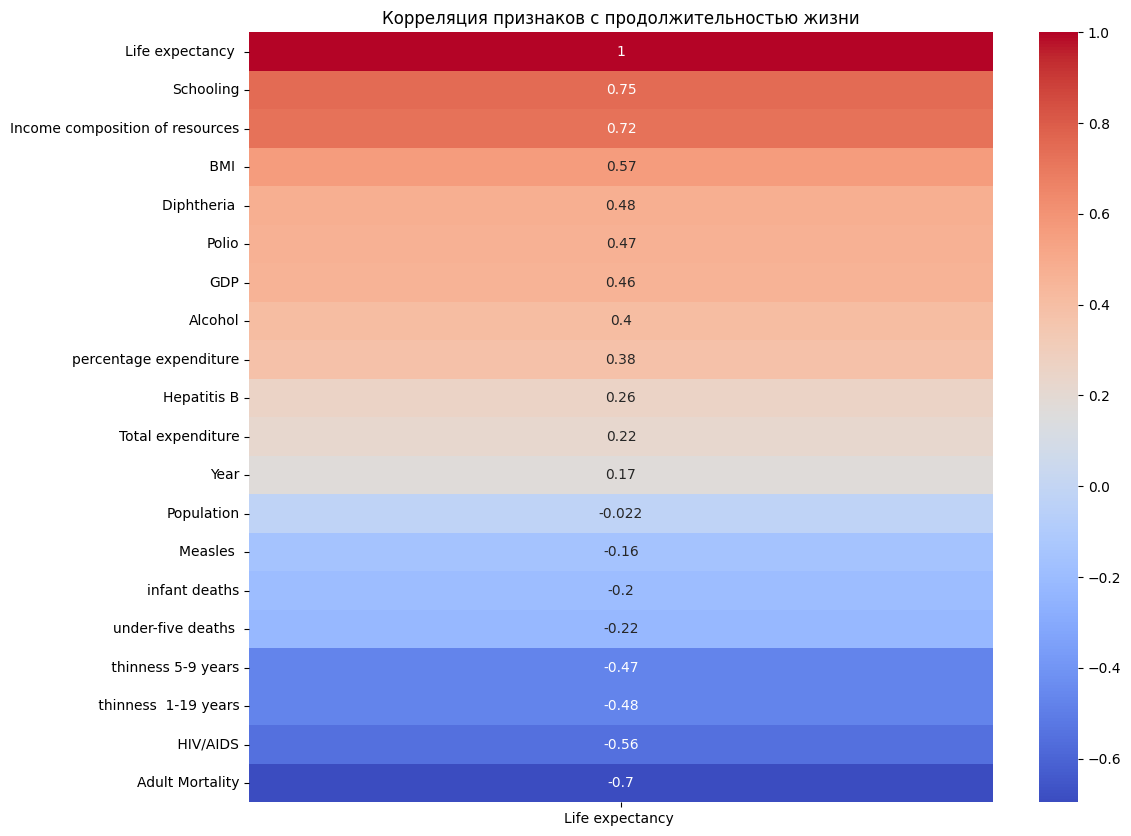

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True)[['Life expectancy ']].sort_values(by='Life expectancy ', ascending=False),
            annot=True, cmap='coolwarm')
plt.title("Корреляция признаков с продолжительностью жизни")
plt.show()


5. Метрики оценки моделей
Для регрессии используем:

MAE (Mean Absolute Error)

RMSE (Root Mean Squared Error)

R² (коэффициент детерминации)

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_true, y_pred):
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': mean_squared_error(y_true, y_pred, squared=False),
        'R²': r2_score(y_true, y_pred)
    }


6.Предобработка

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = df.dropna()
df['Status'] = LabelEncoder().fit_transform(df['Status'])

X = df.drop(['Country', 'Life expectancy '], axis=1)
y = df['Life expectancy ']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


7. Разделение данных

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Удалим строки с пропущенными значениями
df = df.dropna()

# Кодируем статус
df['Status'] = LabelEncoder().fit_transform(df['Status'])

# Отделяем признаки и целевую переменную
X = df.drop(['Country', 'Life expectancy '], axis=1)
y = df['Life expectancy ']

# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


8. Базовые модели

9. Подбор гиперпараметров (GridSearchCV)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR()
}

results_baseline = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results_baseline[name] = evaluate_model(y_test, y_pred)


9. Подбор гиперпараметров (GridSearchCV)

In [21]:
from sklearn.model_selection import GridSearchCV

param_grids = {
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [10, 20]},
    'Gradient Boosting': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]},
    'SVR': {'C': [1, 10], 'kernel': ['linear', 'rbf']}
}

best_models = {}
results_tuned = {}

for name in ['Random Forest', 'Gradient Boosting', 'SVR']:
    grid = GridSearchCV(models[name], param_grids[name], cv=5, scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    best_models[name] = best_model
    y_pred = best_model.predict(X_test)
    results_tuned[name] = evaluate_model(y_test, y_pred)


10. Оценка улучшенных моделей

In [22]:
import pandas as pd

df_base = pd.DataFrame(results_baseline).T
df_base["Тип"] = "Baseline"

df_tuned = pd.DataFrame(results_tuned).T
df_tuned["Тип"] = "Tuned"

df_all = pd.concat([df_base, df_tuned])
df_all = df_all.reset_index().rename(columns={"index": "Модель"})

print(df_all.sort_values(by="RMSE"))


              Модель       MAE      RMSE        R²       Тип
5      Random Forest  1.110186  1.906791  0.948807     Tuned
2      Random Forest  1.131088  1.920304  0.948079  Baseline
6  Gradient Boosting  1.430627  2.148362  0.935014     Tuned
3  Gradient Boosting  1.477238  2.190359  0.932449  Baseline
7                SVR  1.495720  2.368004  0.921047     Tuned
1      Decision Tree  1.669697  2.980675  0.874907  Baseline
4                SVR  2.226224  3.164193  0.859029  Baseline
0  Linear Regression  2.750004  3.607623  0.816749  Baseline


Выводы:

###### Наилучшие результаты показала модель Random Forest после настройки гиперпараметров:

##### Средняя ошибка (MAE): 1.11 года

##### RMSE: 1.91 года

##### Коэффициент детерминации (R²): 0.949

###### Gradient Boosting также показал высокую точность, но немного уступил Random Forest по всем метрикам.

 ###### SVR улучшился после настройки, но остался менее точным (R² ≈ 0.92).

###### Decision Tree и Linear Regression продемонстрировали худшие результаты, особенно без настройки.

Ансамблевые методы (Random Forest и Gradient Boosting) значительно превосходят базовые модели и лучше подходят для задачи прогнозирования продолжительности жизни.

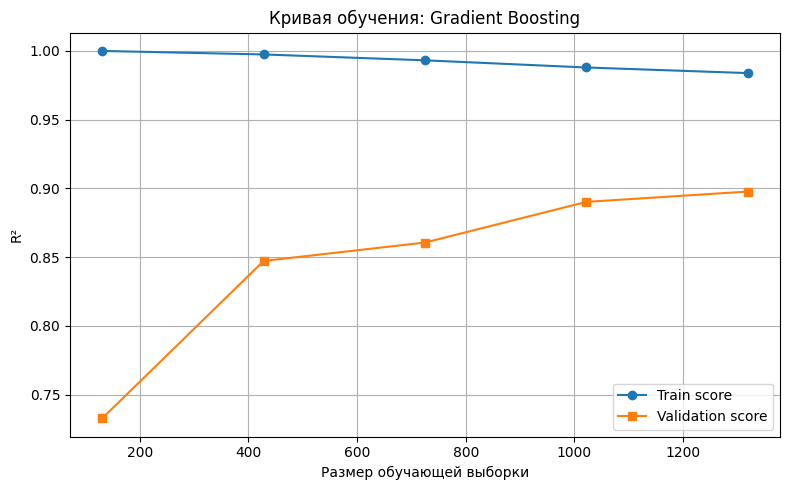

In [23]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=5, scoring='r2')
    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_mean, 'o-', label='Train score')
    plt.plot(train_sizes, val_mean, 's-', label='Validation score')
    plt.title(title)
    plt.xlabel("Размер обучающей выборки")
    plt.ylabel("R²")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# Построим для Gradient Boosting
plot_learning_curve(best_models['Gradient Boosting'], X_scaled, y, "Кривая обучения: Gradient Boosting")
